# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in this lab's data folder.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [6]:
temp = pd.read_csv('../data/Temp_States.csv', sep=';')

#### Print `temp`.

In [7]:
temp

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
1,Albany,New York,9.444444,NaN
2,Buffalo,New York,3.333333,NaN
3,Hartford,Connecticut,17.222222,NaN
4,Bridgeport,Connecticut,14.444444,NaN
5,Treton,New Jersey,22.222222,NaN
6,Newark,New Jersey,20.000000,NaN


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [80]:
temp.dtypes

City            object
State           object
Temperature    float64
Unnamed: 3     float64
dtype: object

#### Select the rows where state is New York.

In [23]:
ny = temp[(temp['State'] == 'New York')]
ny

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
1,Albany,New York,9.444444,NaN
2,Buffalo,New York,3.333333,NaN


#### What is the average temperature of cities in New York?

In [26]:
temp_ny = ny['Temperature'].mean()
temp_ny

10.740740739000001

#### Which states and cities have a temperature above 15 degrees Celsius?

In [29]:
above_15 = temp[(temp['Temperature'] > 15)]
above_15[['City', 'State', 'Temperature']]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [30]:
above_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [34]:
mask = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
temp.loc[mask, :]

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
3,Hartford,Connecticut,17.222222,NaN


#### Find the mean and standard deviation of the temperature of each state.

In [49]:
avg = temp.groupby('State')[['State', 'Temperature']].mean().reset_index()
avg

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [48]:
std = temp.groupby('State')[['State', 'Temperature']].std().reset_index()
std

,State,Temperature
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [58]:
employees = pd.read_csv('../data/employees.csv', sep=';')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN
3,Sonia,HR,Bachelor,F,analyst,4,35,NaN
4,Samuel,Sales,Master,M,associate,3,55,NaN


#### Explore the data types of the `employees` dataframe. Comment your results.

In [59]:
employees.dtypes

Name           object
Department     object
Education      object
Gender         object
Title          object
Years           int64
Salary          int64
Unnamed: 7    float64
dtype: object

#### What's the average salary in this company?

In [61]:
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [62]:
employees['Salary'].max()

70

#### What's the lowest salary?

In [72]:
min_sal = employees['Salary'].min()
min_sal

30

#### Who are the employees with the lowest salary?

In [74]:
employees[employees['Salary'] == min_sal]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### Find all the information about an employee called David.

In [77]:
david = employees[employees['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
2,David,HR,Master,M,analyst,2,30,NaN


#### Could you return only David's salary?

In [86]:
david['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [88]:
employees[employees['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
4,Samuel,Sales,Master,M,associate,3,55,NaN
5,Eva,Sales,Bachelor,F,associate,2,55,NaN
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [90]:
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


In [92]:
employees.loc[:2,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### Find the employees whose title is associate and whose salary is above 55.

In [93]:
mask = (employees['Title'] == 'associate') & (employees['Salary'] > 55)
employees[mask]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [97]:
employees.groupby('Years').mean().reset_index()

,Years,Salary,Unnamed: 7
0,1,35.000000,NaN
1,2,38.333333,NaN
2,3,55.000000,NaN
3,4,35.000000,NaN
4,7,60.000000,NaN
5,8,70.000000,NaN


####  What is the average salary per title?

In [98]:
employees.groupby('Title').mean().reset_index()

,Title,Years,Salary,Unnamed: 7
0,VP,8.00,70.000000,NaN
1,analyst,2.25,32.500000,NaN
2,associate,4.00,56.666667,NaN


####  Find the salary quartiles.


In [107]:
q1 = employees['Salary'].describe()['25%']
q2 = employees['Salary'].describe()['50%']
q3 = employees['Salary'].describe()['75%']

print(f'Q1 = {q1}, Q2 = {q2}, Q3 = {q3}')

Q1 = 35.0, Q2 = 55.0, Q3 = 60.0


#### Is the mean salary different per gender?

In [109]:
employees.groupby(by='Gender').mean()

,Years,Salary,Unnamed: 7
Gender,,,
F,4.0,47.5,NaN
M,4.2,50.0,NaN


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [111]:
employees.groupby('Department').mean()

,Years,Salary,Unnamed: 7
Department,,,
HR,4.666667,45.00,NaN
IT,4.500000,48.75,NaN
Sales,2.500000,55.00,NaN


In [115]:
emp_min = employees.groupby('Department').min()
emp_min

,Name,Education,Gender,Title,Years,Salary,Unnamed: 7
Department,,,,,,,
HR,Ana,Bachelor,F,VP,2,30,NaN
IT,Carlos,Bachelor,F,VP,1,30,NaN
Sales,Eva,Bachelor,F,associate,2,55,NaN


In [114]:
emp_max = employees.groupby('Department').max()
emp_max

,Name,Education,Gender,Title,Years,Salary,Unnamed: 7
Department,,,,,,,
HR,Sonia,Master,M,analyst,8,70,NaN
IT,Pedro,Phd,M,associate,8,70,NaN
Sales,Samuel,Master,M,associate,3,55,NaN


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [119]:
dif = emp_max[['Salary']] - emp_min[['Salary']]
dif

,Salary
Department,
HR,40
IT,40
Sales,0


# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [175]:
orders = pd.read_csv('../data/Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [176]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [177]:
desc_orders = orders.describe().T
desc_orders

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average purchase price?

In [178]:
avg_pur_price = desc_orders.loc['amount_spent','mean']
avg_pur_price

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [179]:
max_pur_price = desc_orders.loc['amount_spent','max']
max_pur_price

168469.6

In [180]:
min_pur_price = desc_orders.loc['amount_spent','min']
min_pur_price

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [181]:
cust_spain = orders.loc[orders['Country'] == 'Spain',:]['CustomerID'].unique()
cust_spain

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [182]:
len(cust_spain)

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [216]:
qty = orders.groupby('CustomerID').sum().reset_index()
mask = qty['Quantity'] > 50
qty = qty[mask]
qty['CustomerID']

0       12346
1       12347
2       12348
3       12349
4       12350
        ...  
4333    18278
4335    18281
4336    18282
4337    18283
4338    18287
Name: CustomerID, Length: 4091, dtype: int64

#### Select orders from Spain that include more than 50 items.

In [214]:
qty = qty.join(orders['Country'], on='CustomerID')
qty_spain = qty.loc[qty['Country'] == 'Spain', :]

In [215]:
qty_spain

,CustomerID,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent,Country
1200,13974,11530470,16022468,56308,280,140,392,249,61.51,413.59,Spain
1201,13975,95708527,189610470,679718,2450,833,4263,1732,742.05,2526.28,Spain
1202,13976,1923705,5534080,20110,50,20,90,154,35.68,357.98,Spain
1203,13978,6357952,8596825,30165,151,33,221,315,18.16,196.79,Spain
1204,13979,19596897,30700512,108594,486,108,702,639,98.94,869.87,Spain
1205,13980,4270629,6274631,22121,110,11,143,172,43.06,200.14,Spain
1206,13982,23711126,61599761,223198,811,222,1599,1136,247.76,1871.81,Spain
1207,13983,18419333,58999737,215162,622,242,1430,1183,677.31,2603.43,Spain
1208,13984,2921473,8832892,32171,128,62,214,679,33.74,920.51,Spain
1209,13985,123378017,199024625,705861,3036,1263,4063,3447,832.19,7060.13,Spain


#### Select all free orders.

In [218]:
mask = orders['UnitPrice'] == 0
orders[mask]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [262]:
lunch_bag = orders[(orders['Description'].apply(lambda x : x.startswith('lunch bag')))]
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [234]:
mask = orders['year'] == 2011
lunch_bag.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

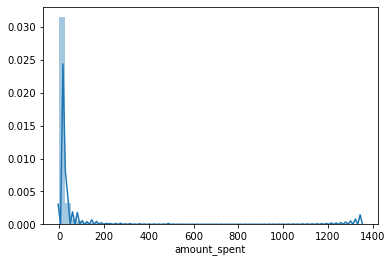

In [274]:
spain = orders[orders['Country'] == 'Spain']
sns.distplot(spain['amount_spent'])

#### Select all orders made in the month of August.

In [237]:
mask = orders['month'] == 8
aug_orders = orders[mask]
aug_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [244]:
aug_orders['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [251]:
aug_orders.groupby('Country')[['Country', 'amount_spent']].mean().reset_index()

,Country,amount_spent
0,Australia,210.179439
1,Austria,17.228182
2,Belgium,18.319691
3,Canada,10.312000
4,Channel Islands,34.977000
5,Denmark,13.321875
6,EIRE,28.612782
7,Finland,22.565574
8,France,24.272337
9,Germany,24.177069


#### What's the most expensive item?

In [254]:
orders[['Description','UnitPrice']].max()

Description    zinc wire sweetheart letter tray
UnitPrice                               8142.75
dtype: object

#### What is the average amount spent per year?

In [258]:
orders.groupby('year')['amount_spent'].mean().reset_index()

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
